<a href="https://colab.research.google.com/github/Rupasri20055/K-Nearest-Neighbors-KNN-Classification/blob/main/K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


 Load Dataset (CSV Upload)

In [72]:
df = pd.read_csv("Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


**Encode Target Variable (convert Species to numbers)**

In [73]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


 Split Features & Target

In [74]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Standardize Features**

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Fit KNN Classifier (K=5)**

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train);


 Evaluate Model

In [78]:
y_pred = knn.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Try Different K Values

K=1 → Accuracy: 1.0000
K=3 → Accuracy: 1.0000
K=5 → Accuracy: 1.0000
K=7 → Accuracy: 1.0000
K=9 → Accuracy: 1.0000


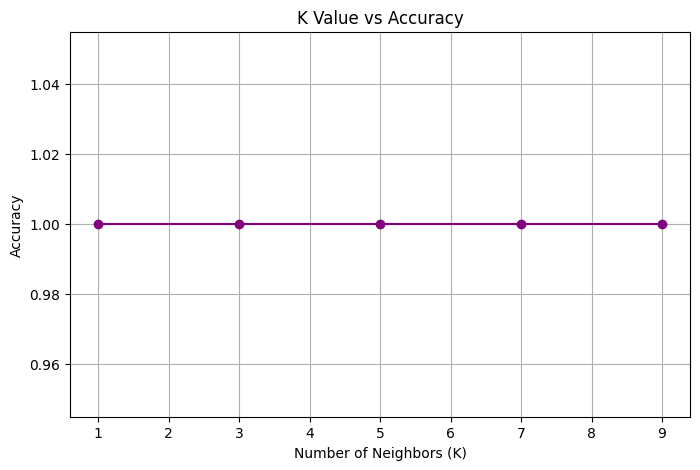

In [80]:
from sklearn.metrics import accuracy_score

# Test different K values and record their accuracies
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.4f}")

# Plot K vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='purple')
plt.title('K Value vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


**Decision Boundary Plot (using 2 Features)**

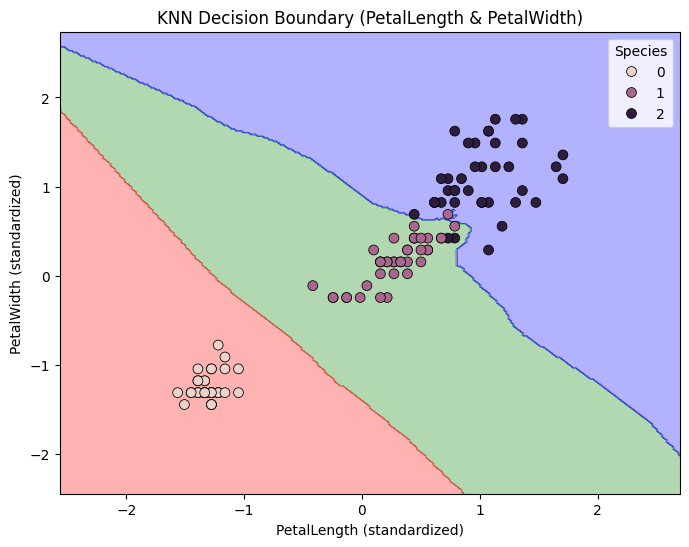

In [81]:
# Select 2 numeric features for 2D decision boundary visualization
X_2D = df[['PetalLengthCm', 'PetalWidthCm']]
y_2D = df['Species']

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42)

# Standardize
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

# Train KNN
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled2, y_train2)

# Mesh grid for plotting
h = .02
x_min, x_max = X_train_scaled2[:, 0].min() - 1, X_train_scaled2[:, 0].max() + 1
y_min, y_max = X_train_scaled2[:, 1].min() - 1, X_train_scaled2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on grid
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
sns.scatterplot(x=X_train_scaled2[:, 0], y=X_train_scaled2[:, 1], hue=y_train2, s=50, edgecolor='k')
plt.title('KNN Decision Boundary (PetalLength & PetalWidth)')
plt.xlabel('PetalLength (standardized)')
plt.ylabel('PetalWidth (standardized)')
plt.show()
